In [1]:
#import the relevant libraries
from google.colab import files
import pandas
import numpy as np
import matplotlib.pyplot as plt
import io
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import KFold
from mpl_toolkits import mplot3d
from keras.optimizers import Adam
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import time

In [2]:
#Kirsch's Solution for hoop stress
def sigt(sigref, a, r, theta):
  sigmatheta = 0.5*sigref*(1+(a/r)**2) - 0.5*sigref*(1+3*(a/r)**4)*np.cos(2*theta*np.pi/180)
  return sigmatheta

In [3]:
#generate the x values along y = 0
xp = np.linspace(0,100,30)
#radius varying between 10 and 60
a = np.linspace(10,60,6)
#theta at 90 to get hoop stress along y=0
theta = 90
#reference (remote) stress of 1
sigref = 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/400
2/2 [==============================] - 2s 448ms/step - loss: 1.7249 - val_loss: 0.9687
Epoch 2/400
2/2 [==============================] - 0s 98ms/step - loss: 1.7202 - val_loss: 0.9650
Epoch 3/400
2/2 [==============================] - 0s 44ms/step - loss: 1.7165 - val_loss: 0.9613
Epoch 4/400
2/2 [==============================] - 0s 52ms/step - loss: 1.7123 - val_loss: 0.9578
Epoch 5/400
2/2 [==============================] - 0s 73ms/step - loss: 1.7082 - val_loss: 0.9543
Epoch 6/400
2/2 [==============================] - 0s 85ms/step - loss: 1.7040 - val_loss: 0.9508
Epoch 7/400
2/2 [==============================] - 0s 92ms/step - loss: 1.7002 - val_loss: 0.9474
Epoch 8/400
2/2 [==============================] - 0s 50ms/step - loss: 1.6961 - val_loss: 0.9439
Epoch 9/400
2/2 [==============================] - 0s 163ms/step - loss: 1.6931 - val_loss: 0.9405
Epoch 10/400
2/2 [==============================] - 0s 94ms/step - loss: 1.6885 - val_loss: 0.9372
Epoch 11/400
2/2 

2/2 [==============================] - 0s 5ms/step
Epoch 1/400
1/1 [==============================] - 1s 990ms/step - loss: 1.8868 - val_loss: 0.5498
Epoch 2/400
1/1 [==============================] - 0s 37ms/step - loss: 1.8825 - val_loss: 0.5473
Epoch 3/400
1/1 [==============================] - 0s 52ms/step - loss: 1.8783 - val_loss: 0.5448
Epoch 4/400
1/1 [==============================] - 0s 46ms/step - loss: 1.8741 - val_loss: 0.5422
Epoch 5/400
1/1 [==============================] - 0s 37ms/step - loss: 1.8700 - val_loss: 0.5397
Epoch 6/400
1/1 [==============================] - 0s 37ms/step - loss: 1.8658 - val_loss: 0.5372
Epoch 7/400
1/1 [==============================] - 0s 45ms/step - loss: 1.8617 - val_loss: 0.5347
Epoch 8/400
1/1 [==============================] - 0s 40ms/step - loss: 1.8576 - val_loss: 0.5323
Epoch 9/400
1/1 [==============================] - 0s 39ms/step - loss: 1.8536 - val_loss: 0.5298
Epoch 10/400
1/1 [==============================] - 0s 40ms/step -

2/2 [==============================] - 0s 8ms/step


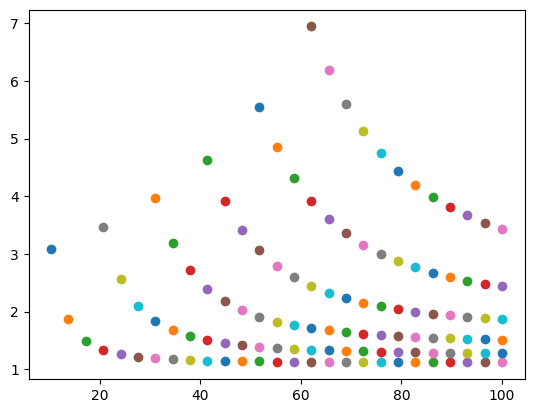

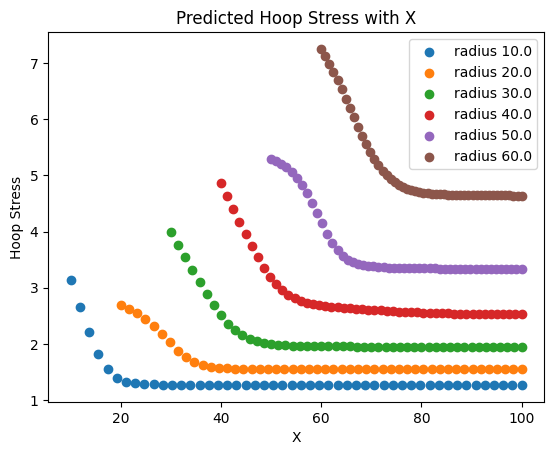

In [4]:
#The ANN accepts x as the only input parameter
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
etime = []
loss = []
#looping through each value of a for simplicity
for i in a:
  #create empty lists to store the calculated values
  x1p = []
  sig = []
  for j in xp:
    if abs(j) > i:
      #the ratio a/w, the radius to the length/2
      awp = i/100
      #apply the equation, and then scale using the ratio above, to capture higher stress concentration for larger holes
      sigthetap = sigt(sigref, i, j, theta)/(1-awp)
      #visualize the stress along x
      ax.scatter(j, sigthetap, label="radius "+str(i))
      plt.ylabel("Hoop Stress")
      plt.xlabel("X")
      plt.title("Actual Hoop Stress with X")
      plt.legend()
      x1p.append(j)
      sig.append(sigthetap)

  # Set up a sequential neural network
  scaler = StandardScaler()


  model = Sequential()

  # Scale the training data
  # train the data on x, for each value of a
  x1p_normalized = (x1p - np.mean(x1p)) / np.std(x1p)
  sig_normalized = (sig - np.mean(sig)) / np.std(sig)

  # First split the data into a training set and a temporary set.
  x1p_train, x1p_temp, sig_train, sig_temp = train_test_split(x1p_normalized, sig_normalized, test_size=0.3)

  # Then split the temp_set into a validation set and a testing set.
  x1p_val, x1p_test, sig_val, sig_test = train_test_split(x1p_temp, sig_temp, test_size=0.5)


  # # Add L2 regularization and dropout for the hidden layers
  # model.add(Dense(units=3, activation='gelu', input_dim=1, kernel_regularizer=l2(0.01)))
  # model.add(Dropout(0.2))
  # model.add(Dense(units=6, activation='gelu', kernel_regularizer=l2(0.01)))
  # model.add(Dropout(0.2))
  # model.add(Dense(units=6, activation='gelu', kernel_regularizer=l2(0.01)))
  # model.add(Dropout(0.2))
  # model.add(Dense(units=6, activation='gelu', kernel_regularizer=l2(0.01)))
  # model.add(Dropout(0.2))

  # model.add(Dense(units=1, activation='softplus'))
  # Add a layer of 3 nodes of GeLUs, taking two input parameters
  model.add(Dense(units=3, activation='gelu', input_dim=1))

  # Add a linear node at the end to combine the nodes together
  model.add(Dense(units=6, activation='gelu'))

  # Add a linear node at the end to combine the nodes together
  model.add(Dense(units=6, activation='gelu'))

  # Add a linear node at the end to combine the nodes together
  model.add(Dense(units=6, activation='gelu'))


  # Add the final output layer with the 'softplus' activation function
  model.add(Dense(units=1, activation='softplus'))

  #learning rate
  optimizer = Adam(lr=0.001)

  # Compile the model
  model.compile(loss="mean_squared_error", optimizer=optimizer)

  start_time = time.time()

  # Fit the data 
  # Include validation data
  history = model.fit(x1p_train, sig_train, epochs=400, batch_size=12, validation_data=(x1p_val, sig_val))

  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  etime.append(execution_time)

  # Evaluate the model on the test set
  test_loss = model.evaluate(x1p_test, sig_test, verbose=0)
  loss.append(test_loss)

  #plot all the testing data on one curve
  xtest = np.linspace(i,100,50)
  xtest_normalized = (xtest - np.mean(x1p)) / np.std(x1p)

  y_pred_normalized = model.predict(xtest_normalized)
  y_pred = y_pred_normalized * np.std(sig) + np.mean(sig)
  ax1.scatter(xtest, y_pred, label="radius "+str(i))
  plt.ylabel("Hoop Stress")
  plt.xlabel("X")
  plt.title("Predicted Hoop Stress with X")
  plt.legend()

In [5]:
training_time = sum(etime)
total_loss = sum(loss)/len(loss)
print(f"Execution time per radius: {etime} seconds")
print(f"Test loss per radius: {loss}")
print(f"Total Execution time: {training_time} seconds")
print(f"Average Test loss: {total_loss}")


Execution time per radius: [28.16491460800171, 41.786205768585205, 24.55959725379944, 41.65004229545593, 41.805570125579834, 21.763712167739868] seconds
Test loss per radius: [0.12299644947052002, 0.14230895042419434, 0.16672468185424805, 0.35471585392951965, 0.5130527019500732, 0.195460245013237]
Total Execution time: 199.730042219162 seconds
Average Test loss: 0.24920981377363205
